In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data  # Features
y = iris.target  # Target variable (species)
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

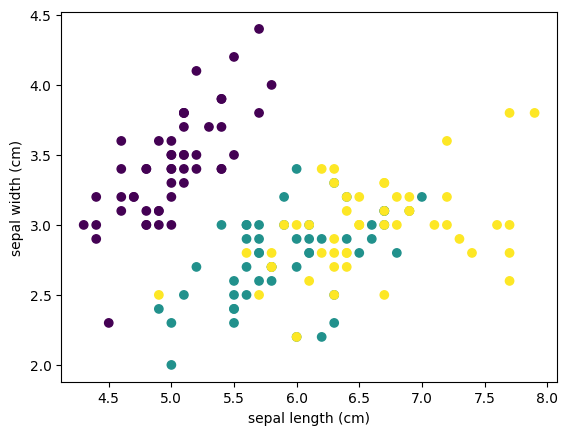

In [2]:
import matplotlib.pyplot as plt

# Visualize the dataset using scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model and fit it on the training data
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Predict the labels of the test data using the trained model
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate the confusion matrix of the model
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix:\n{cm}")


Accuracy: 1.0
Confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [6]:
# Predict the species of a new iris flower
new_data = [[5.1, 3.5, 1.4, 0.2]]  # Example data
new_data = scaler.transform(new_data)  # Normalize the data
species = model.predict(new_data)[0]  # Predict the species
print(f"Predicted species: {iris.target_names[species]}")


Predicted species: setosa
